In [1]:
# import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

import scienceplots

plt.style.use(['science', 'grid', 'nature', 'notebook'])

In [2]:
def load_data(path2data):
    with open(path2data, 'r') as f:
        data = f.read()

        # cargo time step
        index_time_step = data.find('time step:')
        index_time_step_end = data.find('\n', index_time_step)
        h = float(data[index_time_step+len('time step:'):index_time_step_end])

        # cargo time_limits:
        index_time_limits = data.find('time limits:')
        index_time_limits_end = data.find('\n', index_time_limits)
        time_limits = data[index_time_limits+len('time limits:'):index_time_limits_end].split(',')
        time_limits = [float(i) for i in time_limits]

        # Cargo estados
        index_start_shape = data.find('shape:')
        index_end_shape = data.find('\n', index_start_shape)
        shape = data[index_start_shape+len('shape:'):index_end_shape].split(',')
        shape = [int(i) for i in shape]

        index_start_n_states = data.find('n_states:')
        index_end_n_states = data.find('\n', index_start_n_states)
        n_states = int(data[index_start_n_states+len('n_states:'):index_end_n_states])

        states = data[index_end_n_states+2:].strip().split('),(')   # separo los estados
        states[-1] = states[-1][:-1]    # saco el ultimo parentesis

        # los paso a numeros complejos de numpy
        res = np.empty(n_states*shape[0]*shape[1], dtype=complex)
        for i, state in enumerate(states):
            state_splited = state.split(',')
            res[i] = complex(float(state_splited[0]), float(state_splited[1]))

        res = res.reshape(n_states, shape[0], shape[1])

        return res, h, time_limits


In [3]:
path2data_00 = '../results/results_bell_state_00.csv'
path2data_01 = '../results/results_bell_state_01.csv'
path2data_10 = '../results/results_bell_state_10.csv'
path2data_11 = '../results/results_bell_state_11.csv'

states_00, h_00, time_limits_00 = load_data(path2data_00)
states_01, h_01, time_limits_01 = load_data(path2data_01)
states_10, h_10, time_limits_10 = load_data(path2data_10)
states_11, h_11, time_limits_11 = load_data(path2data_11)

In [4]:
def concurrence(states):
    return np.array([qt.concurrence(qt.Qobj(s, dims=[[2, 2], [2, 2]])) for s in states])

In [5]:
concurrence_00 = concurrence(states_00)
concurrence_01 = concurrence(states_01)
concurrence_10 = concurrence(states_10)
concurrence_11 = concurrence(states_11)

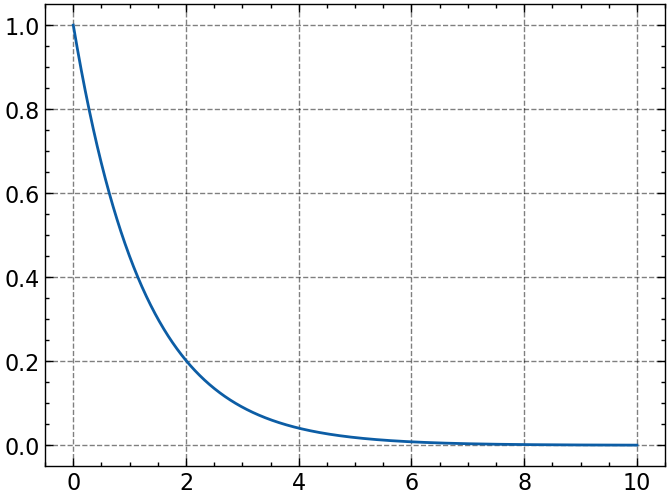

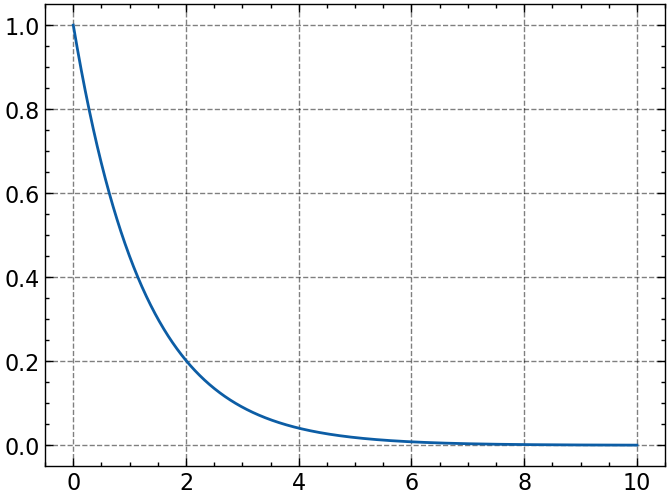

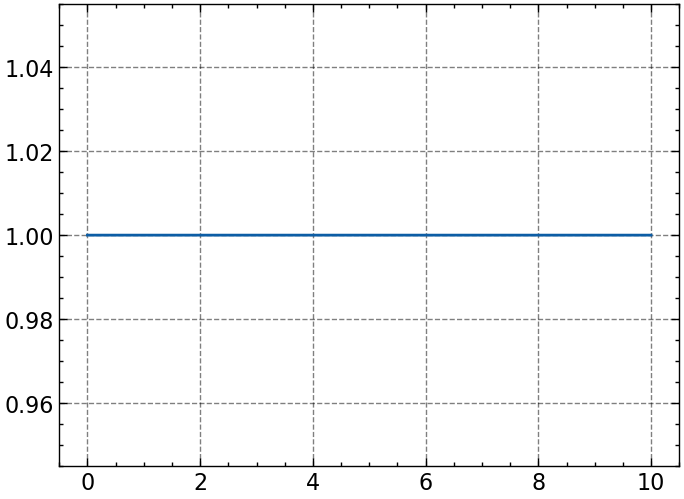

Text(0, 0.5, 'Concurrence')

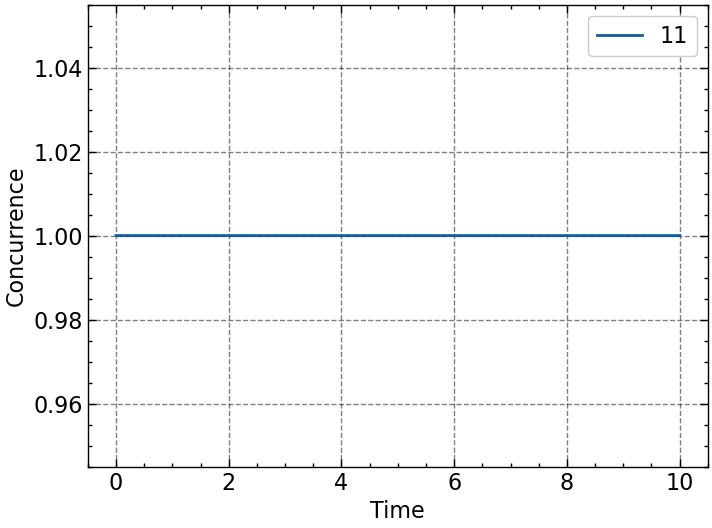

In [9]:
time_axis = np.arange(time_limits_00[0], time_limits_00[1]+h_00, h_00)

plt.plot(time_axis, concurrence_00, label='00')
plt.show()
plt.plot(time_axis, concurrence_01, label='01')
plt.show()
plt.plot(time_axis, concurrence_10, label='10')
plt.show()
plt.plot(time_axis, concurrence_11, label='11')
# plt.show()
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concurrence')